In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
import seaborn as sns
import pybaseball as pb
import pandas as pd


Part 1 - ERA-BY-ERA ANALYSIS: Descriptive Stats & Visuals (Also include each era codes)

In [34]:
#There has been a statistically significant increase in power hitting in Major League Baseball 
#over time, as measured by home runs per at-bat (HR/AB), slugging percentage (SLG), and isolated power (ISO).
#Null (H₀): There is no significant difference in power metrics over time.

#Alternative (H₁): There is a significant increase in power metrics over time.

In [ ]:
batting_stats_all = pd.read_csv('batting_stats_1900_2025.csv')
batting_stats_all['HR_per_AB'] = batting_stats_all['HR'] / batting_stats_all['AB']
batting_stats_all['H_per_AB'] = batting_stats_all['H'] / batting_stats_all['AB']

yearly_power = (
    batting_stats_all
    .groupby('Season')[['HR_per_AB', 'SLG', 'ISO']]
    .mean()
    .reset_index()
)

dead_ball_era = yearly_power[(yearly_power['Season'] >= 1900) & (yearly_power['Season'] <= 1919)]
incr_power_era = yearly_power[(yearly_power['Season'] >= 1920) & (yearly_power['Season'] <= 1960)]
modern_era = yearly_power[(yearly_power['Season'] >= 1961) & (yearly_power['Season'] <= 1993)]
steroid_era = yearly_power[(yearly_power['Season'] >= 1994) & (yearly_power['Season'] <= 2004)]
cleanup_era = yearly_power[(yearly_power['Season'] >= 2005) & (yearly_power['Season'] <= 2014)]
statcast_era = yearly_power[(yearly_power['Season'] >= 2015) & (yearly_power['Season'] <= 2025)]






,Season,HR_per_AB,SLG,ISO
115,2015,0.033668,0.437782,0.165796
116,2016,0.039703,0.456589,0.183630
117,2017,0.042727,0.463306,0.192264
118,2018,0.038674,0.446723,0.181830
119,2019,0.047781,0.481193,0.208607
120,2020,0.044895,0.455479,0.194387
121,2021,0.043850,0.457379,0.192636
122,2022,0.037398,0.431100,0.172831
123,2023,0.040109,0.444687,0.182896
124,2024,0.039513,0.435922,0.177791


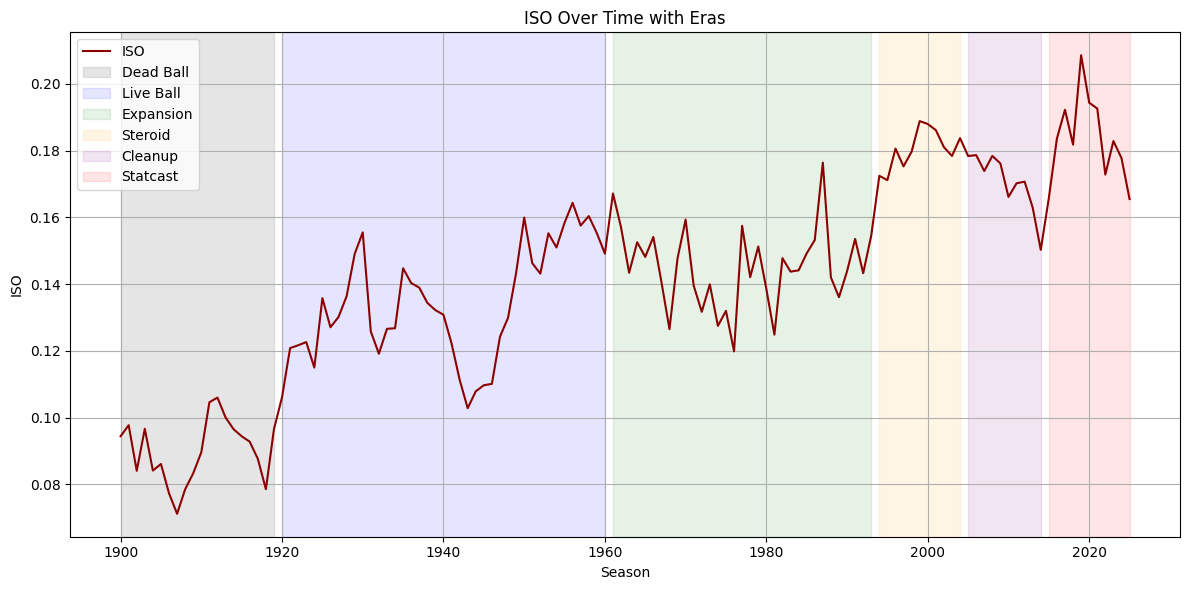

In [141]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_power['Season'], yearly_power['ISO'], label='ISO', color='darkred')
#plt.plot(yearly_power['Season'], yearly_power['HR_per_AB'], label='HR', color='darkred')
#plt.plot(yearly_power['Season'], yearly_power['SLG'], label='SLG', color='darkred')
plt.axvspan(1900, 1919, color='gray', alpha=0.2, label='Dead Ball')
plt.axvspan(1920, 1960, color='blue', alpha=0.1, label='Live Ball')
plt.axvspan(1961, 1993, color='green', alpha=0.1, label='Expansion')
plt.axvspan(1994, 2004, color='orange', alpha=0.1, label='Steroid')
plt.axvspan(2005, 2014, color='purple', alpha=0.1, label='Cleanup')
plt.axvspan(2015, 2025, color='red', alpha=0.1, label='Statcast')

#plt.title('HR per AB Over Time with Eras')
plt.title('ISO Over Time with Eras')
#plt.title('SLG Orer Time with Eras')
plt.xlabel('Season')
plt.ylabel('ISO')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [148]:
import statsmodels.api as sm

print("Regression Hypothesis Test: Power Metrics vs. Time")
print("Claim: There is a statistically significant increase in power hitting over time.\n")

for stat in ['HR_per_AB', 'SLG', 'ISO']:
    X = yearly_power[['Season']]
    X = sm.add_constant(X)
    y = yearly_power[stat]

    model = sm.OLS(y, X).fit()
    slope = model.params['Season']
    p_val = model.pvalues['Season']
    r2 = model.rsquared

    print(f"{stat}:")
    print(f"  Slope = {slope:.6f}")
    print(f"  R^2 = {r2:.4f}")
    print(f"  p-value = {p_val:.50f} {': Statistically Significant' if p_val < 0.05 else '→ Not Significant'}\n")


Regression Hypothesis Test: Power Metrics vs. Time
Claim: There is a statistically significant increase in power hitting over time.

HR_per_AB:
  Slope = 0.000290
  R^2 = 0.8374
  p-value = 0.00000000000000000000000000000000000000000000000001 : Statistically Significant

SLG:
  Slope = 0.000613
  R^2 = 0.4715
  p-value = 0.00000000000000000069568138849410483239725716730250 : Statistically Significant

ISO:
  Slope = 0.000740
  R^2 = 0.7526
  p-value = 0.00000000000000000000000000000000000000201660762438 : Statistically Significant



Part 2 - Best Era Analysis: Which Era Had the Most Power?

In [153]:
era_means = pd.DataFrame({
    'Era': ['Dead Ball', 'Incr Power', 'Modern', 'Steroid', 'Cleanup', 'Statcast'],
    'HR/AB': [
        dead_ball_era['HR_per_AB'].mean(),
        incr_power_era['HR_per_AB'].mean(),
        modern_era['HR_per_AB'].mean(),
        steroid_era['HR_per_AB'].mean(),
        cleanup_era['HR_per_AB'].mean(),
        statcast_era['HR_per_AB'].mean()
    ],
    'SLG': [
        dead_ball_era['SLG'].mean(),
        incr_power_era['SLG'].mean(),
        modern_era['SLG'].mean(),
        steroid_era['SLG'].mean(),
        cleanup_era['SLG'].mean(),
        statcast_era['SLG'].mean()
    ],
    'ISO': [
        dead_ball_era['ISO'].mean(),
        incr_power_era['ISO'].mean(),
        modern_era['ISO'].mean(),
        steroid_era['ISO'].mean(),
        cleanup_era['ISO'].mean(),
        statcast_era['ISO'].mean()
    ]
})

# Find which era has the highest average ISO
best_era_hr = era_means.loc[era_means['HR/AB'].idxmax(), 'Era']
best_era_slg = era_means.loc[era_means['SLG'].idxmax(), 'Era']
best_era_iso = era_means.loc[era_means['ISO'].idxmax(), 'Era']
print("Best era by ISO:", best_era_hr, statcast_era['ISO'].mean())
print("Best era by SLG:", best_era_slg, steroid_era['SLG'].mean())
print("Best era by HR/AB:", best_era_iso, statcast_era['HR_per_AB'].mean())


Best era by ISO: Statcast 0.18347087061815504
Best era by SLG: Steroid 0.4641306340767743
Best era by HR/AB: Statcast 0.04045311229431073


In [151]:

print(f"\nT-tests: Is {best_era_iso} significantly better than other eras (ISO)?")
for era_name, era_df in zip(
    ['Dead Ball', 'Live Ball', 'Expansion', 'Steroid', 'Post-Steroid', 'Statcast'],
    [dead_ball_era, incr_power_era, modern_era, steroid_era,cleanup_era, statcast_era]
):
    if era_name == best_era_iso:
        continue
    t, p = ttest_ind(
        statcast_era['ISO'],
        era_df['ISO'],
        equal_var=False
    )
    print(f"{best_era_iso} vs. {era_name}: p = {p:.15f} : {'Significant' if p < 0.05 else 'Not Significant'}")



T-tests: Is Statcast significantly better than other eras (ISO)?
Statcast vs. Dead Ball: p = 0.000000000000467 : Significant
Statcast vs. Live Ball: p = 0.000000001436343 : Significant
Statcast vs. Expansion: p = 0.000000195903288 : Significant
Statcast vs. Steroid: p = 0.503303963892786 : Not Significant
Statcast vs. Post-Steroid: p = 0.016001220743230 : Significant


Part 3, Narrowing it down - Top players only, Analyzing stacast and steroid based on top hitters

In [121]:
batting_stats_steroid = batting_stats_all[(batting_stats_all['Season'] >= 1994) & (batting_stats_all['Season'] <= 2004)]
batting_stats_statcast = batting_stats_all[(batting_stats_all['Season'] >= 2015) & (batting_stats_all['Season'] <= 2025)]

pa_statcast = batting_stats_statcast['PA'].quantile(0.25)
pa_steroid = batting_stats_steroid['PA'].quantile(0.25)

filtered_statcast = batting_stats_statcast[batting_stats_statcast['PA'] >= 500]
top_statcast = filtered_statcast.sort_values('ISO', ascending=False).head(100)

filtered_ssteroid = batting_stats_steroid[batting_stats_steroid['PA'] >= 500]
top_steroid = filtered_ssteroid.sort_values('ISO', ascending=False).head(100)

filtered_statcast_any = batting_stats_statcast[batting_stats_statcast['PA'] >= 0]
top_statcast_any = filtered_statcast_any.sort_values('ISO', ascending=False).head(100)


filtered_ssteroid_any = batting_stats_steroid[batting_stats_steroid['PA'] >= 0]
top_steroid_any = filtered_ssteroid_any.sort_values('ISO', ascending=False).head(100)

avg_steroid = top_steroid['ISO'].mean()
avg_statcast = top_statcast['ISO'].mean()
avg_steroid_half = top_steroid_any['ISO'].mean()
avg_statcast_half = top_statcast_any['ISO'].mean()
print(f"\nAverage ISO for top 100 players in Steroid Era (500 PA): {avg_steroid:.4f}")
print(f"Average ISO for top 100 players in Statcast Era (500 PA): {avg_statcast:.4f}")
print(f"Average ISO for top 100 players in Steroid Era (Any PA): {avg_steroid_half:.4f}")
print(f"Average ISO for top 100 players in Statcast Era (Any PA): {avg_statcast_half:.4f}")

def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_steroid = find_outliers(batting_stats_steroid, 'ISO')
outliers_statcast = find_outliers(batting_stats_statcast, 'ISO')
print(f"\nNumber of outliers in Steroid Era: {len(outliers_steroid)}")
print(f"Number of outliers in Statcast Era: {len(outliers_statcast)}")




Average ISO for top 100 players in Steroid Era (500 PA): 0.3239
Average ISO for top 100 players in Statcast Era (500 PA): 0.2892
Average ISO for top 100 players in Steroid Era (Any PA): 0.3283
Average ISO for top 100 players in Statcast Era (Any PA): 0.3029

Number of outliers in Steroid Era: 15
Number of outliers in Statcast Era: 10


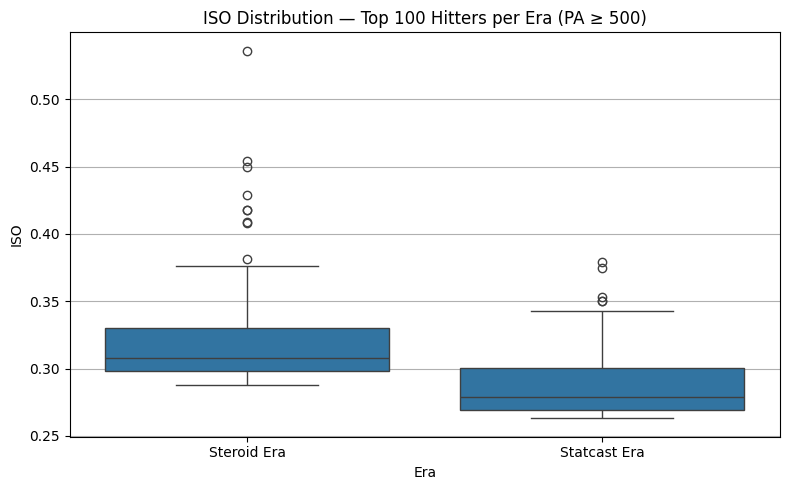

C:\Users\sdeck\AppData\Local\Temp\ipykernel_13844\769000440.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(top_steroid['ISO'], label='Steroid Era', shade=True)
C:\Users\sdeck\AppData\Local\Temp\ipykernel_13844\769000440.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(top_statcast['ISO'], label='Statcast Era', shade=True)


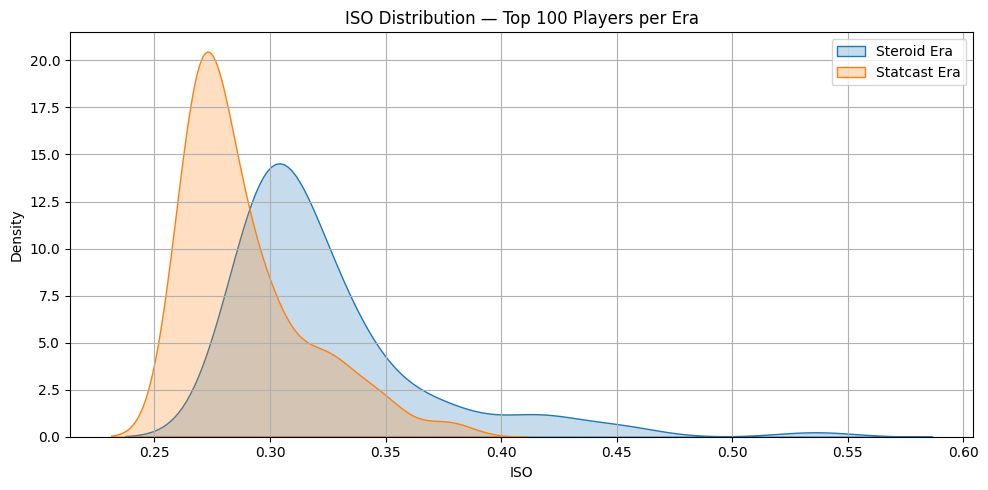

In [135]:

top_steroid['Era'] = 'Steroid Era'
top_statcast['Era'] = 'Statcast Era'

top_combined = pd.concat([top_steroid, top_statcast])

plt.figure(figsize=(8, 5))
sns.boxplot(data=top_combined, x='Era', y='ISO')
plt.title('ISO Distribution — Top 100 Hitters per Era (PA ≥ 500)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.kdeplot(top_steroid['ISO'], label='Steroid Era', shade=True)
sns.kdeplot(top_statcast['ISO'], label='Statcast Era', shade=True)
plt.title('ISO Distribution — Top 100 Players per Era')
plt.xlabel('ISO')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [140]:
#null - there is no significant difference in iso between the two eras
#alternative - there is a significant difference in iso between the two eras
t_stat, p_val = ttest_ind(
    top_steroid['ISO'], top_statcast['ISO'],
    equal_var=False
)

print(f"T-statistic = {t_stat:.3f}")
print(f"P-value = {p_val:.20f}")

if p_val < 0.05:
    print("Statistically significant difference: Steroid vs. Statcast")
else:
    print("No statistically significant difference")


T-statistic = 6.930
P-value = 0.00000000008797047369
Statistically significant difference: Steroid vs. Statcast


Part 4. Outlier Analysis: Remove extreme power hitters from each era

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to full player datasets
batting_stats_steroid_no_outliers = remove_outliers(batting_stats_steroid, 'ISO')
batting_stats_statcast_no_outliers = remove_outliers(batting_stats_statcast, 'ISO')

# Apply PA filter
filtered_steroid_no_outliers = batting_stats_steroid_no_outliers[batting_stats_steroid_no_outliers['PA'] >= 500]
filtered_statcast_no_outliers = batting_stats_statcast_no_outliers[batting_stats_statcast_no_outliers['PA'] >= 500]

# Get top 100 by ISO
top_steroid_no_outliers = filtered_steroid_no_outliers.sort_values('ISO', ascending=False).head(100)
top_statcast_no_outliers = filtered_statcast_no_outliers.sort_values('ISO', ascending=False).head(100)

avg_steroid_no_out = top_steroid_no_outliers['ISO'].mean()
avg_statcast_no_out = top_statcast_no_outliers['ISO'].mean()

print(f"\nNo Outliers: Average ISO for top 100 players in Steroid Era: {avg_steroid_no_out:.4f}")
print(f"No Outliers: Average ISO for top 100 players in Statcast Era: {avg_statcast_no_out:.4f}")




No Outliers: Average ISO for top 100 players in Steroid Era: 0.3061
No Outliers: Average ISO for top 100 players in Statcast Era: 0.2827


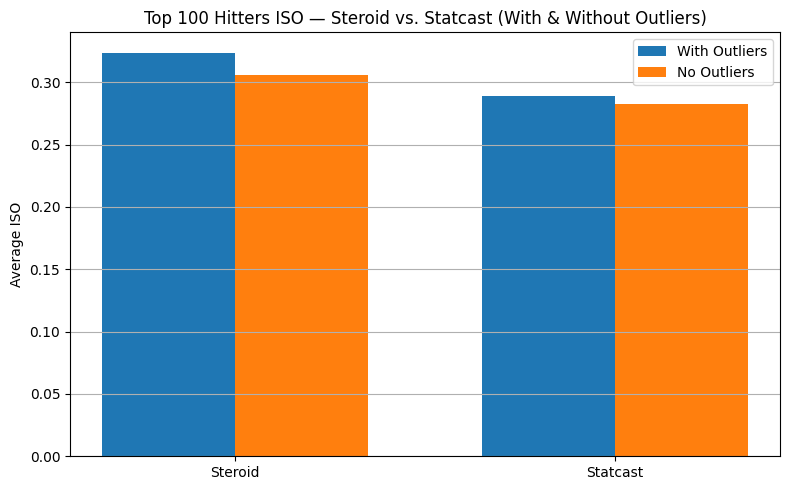

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values
eras = ['Steroid', 'Statcast']
iso_original = [avg_steroid, avg_statcast]
iso_no_outliers = [avg_steroid_no_out, avg_statcast_no_out]

x = np.arange(len(eras))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, iso_original, width, label='With Outliers')
bars2 = ax.bar(x + width/2, iso_no_outliers, width, label='No Outliers')

ax.set_ylabel('Average ISO')
ax.set_title('Top 100 Hitters ISO — Steroid vs. Statcast (With & Without Outliers)')
ax.set_xticks(x)
ax.set_xticklabels(eras)
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()



T-test (no outliers): t = 8.769, p = 0.0000000000000009


In [ ]:
#null - there is no significant difference in average ISO between the two eras excluding outliers
#alternative - there is a significant difference in average ISO between the two eras excluding outliers

t_stat, p_val = ttest_ind(
    top_steroid_no_outliers['ISO'], top_statcast_no_outliers['ISO'],
    equal_var=False
)

print(f"T-statistic = {t_stat:.3f}")
print(f"P-value = {p_val:.20f}")

if p_val < 0.05:
    print("Statistically significant difference: Steroid vs. Statcast")
else:
    print("No statistically significant difference")


T-statistic = 8.769
P-value = 0.00000000000000085403
Statistically significant difference: Steroid vs. Statcast
